# U-net でのセグメンテーション


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import os
path = "/content/gdrive/My Drive/Colab Notebooks"

​
## 【問題1】学習・推定
使用する実装https://github.com/zhixuhao/unet

colab上でkaggle https://qiita.com/katsu1110/items/a8d508a1b6f07bd3a243

In [30]:
#unetダウンロード
!git clone https://github.com/zhixuhao/unet.git

Cloning into 'unet'...
remote: Enumerating objects: 394, done.
remote: Total 394 (delta 0), reused 0 (delta 0), pack-reused 394
Receiving objects: 100% (394/394), 44.91 MiB | 22.03 MiB/s, done.
Resolving deltas: 100% (80/80), done.


In [40]:
!ls

gdrive	kaggle.json  sample_data  unet


In [0]:
unet_path = "unet/main.py"

In [38]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"komiyamori","key":"16698cec31023729ba7b752086e18db3"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [45]:
with open('kaggle.json') as f:
    print(f.read())

{"username":"komiyamori","key":"16698cec31023729ba7b752086e18db3"}


In [46]:
!pip install kaggle

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [55]:
#実行する前にカグルのダウンロードオールとか押して認証をおkしておく
!kaggle competitions download -c tgs-salt-identification-challenge

  0% 0.00/322k [00:00<?, ?B/s]
100% 322k/322k [00:00<00:00, 42.3MB/s]
  0% 0.00/264k [00:00<?, ?B/s]
100% 264k/264k [00:00<00:00, 85.0MB/s]
  0% 0.00/922k [00:00<?, ?B/s]
100% 922k/922k [00:00<00:00, 59.9MB/s]
 99% 162M/163M [00:02<00:00, 84.4MB/s]
100% 163M/163M [00:02<00:00, 73.3MB/s]
 90% 34.0M/37.9M [00:00<00:00, 52.2MB/s]
100% 37.9M/37.9M [00:00<00:00, 95.7MB/s]


In [0]:
#解凍
!unzip test.zip -d test
!unzip train.zip -d train

In [0]:
path = "test/images"

In [91]:
len(os.listdir(path))

18000

In [0]:
!mv train unet/data_sio

In [0]:
from unet.model import *
from unet.data import *

#os.environ["CUDA_VISIBLE_DEVICES"] = "0"


data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'unet/data_sio','images','masks',data_gen_args,save_to_dir = None)

model = unet()
model_checkpoint = ModelCheckpoint('unet/siomodel.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=300,epochs=1,callbacks=[model_checkpoint])

#testGene = testGenerator("unet/data/membrane/test")
#results = model.predict_generator(testGene,30,verbose=1)
#saveResult("data/membrane/test",results)

In [94]:
model_checkpoint = ModelCheckpoint('unet/siomodel.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=300,epochs=1,callbacks=[model_checkpoint])

Epoch 1/1
300/300 [==============================] - 135s 449ms/step - loss: 0.5797 - acc: 0.7450

Epoch 00001: loss improved from inf to 0.57966, saving model to unet/siomodel.hdf5


In [96]:
model.fit_generator(myGene,steps_per_epoch=300,epochs=50,callbacks=[model_checkpoint])

Epoch 1/50
300/300 [==============================] - 134s 447ms/step - loss: 0.2958 - acc: 0.9112

Epoch 00001: loss did not improve from 0.27344
Epoch 2/50
300/300 [==============================] - 134s 447ms/step - loss: 0.2674 - acc: 0.9231

Epoch 00002: loss improved from 0.27344 to 0.26736, saving model to unet/siomodel.hdf5
Epoch 3/50
300/300 [==============================] - 134s 447ms/step - loss: 0.2700 - acc: 0.9153

Epoch 00003: loss did not improve from 0.26736
Epoch 4/50
300/300 [==============================] - 134s 448ms/step - loss: 0.2563 - acc: 0.9230

Epoch 00004: loss improved from 0.26736 to 0.25628, saving model to unet/siomodel.hdf5
Epoch 5/50
300/300 [==============================] - 134s 448ms/step - loss: 0.3177 - acc: 0.9022

Epoch 00005: loss did not improve from 0.25628
Epoch 6/50
300/300 [==============================] - 135s 448ms/step - loss: 0.2747 - acc: 0.9148

Epoch 00006: loss did not improve from 0.25628
Epoch 7/50
300/300 [==================

In [0]:
#重みをドライブへコピー
!cp "/content/unet/siomodel.hdf5" "/content/gdrive/My Drive/Colab Notebooks/"

In [0]:
from keras.preprocessing import image
from keras.preprocessing.image import load_img, save_img, img_to_array, array_to_img

計１００エポック回しました。結果を出力してみる

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:98: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


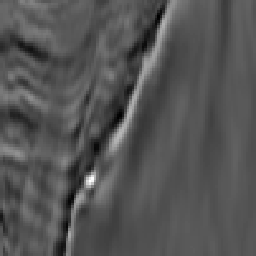

In [124]:
#トレーニングデータ
path = "/content/unet/data_sio/images/0061281eea.png"
image.load_img(path, grayscale=True, color_mode='rgb', target_size=(256,256))

In [125]:
ima =load_img(path, grayscale=True, color_mode='rgb', target_size=(256,256))
array = image.img_to_array(ima)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:98: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [0]:
array = array[np.newaxis,:] / 255.

In [127]:
results = model.predict(array)
saveResult("unet/data_sio",results)

/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:98: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


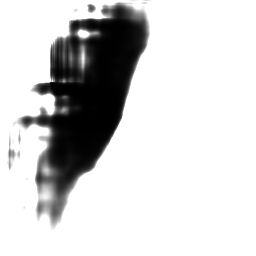

In [128]:
#predictしたデータ
path2 = "/content/unet/data_sio/0_predict.png"
image.load_img(path2, grayscale=True, color_mode='rgb', target_size=(256,256))

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:98: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


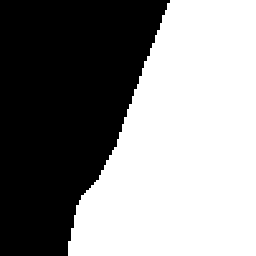

In [123]:
#正解データ
path3 = "/content/unet/data_sio/masks/0061281eea.png"
image.load_img(path3, grayscale=True, color_mode='rgb', target_size=(256,256))

## 【問題2】コードリーディング

In [0]:
#model.pyより
"""
チャンネル方向にコンカットしている。
merge6 = concatenate([drop4,up6], axis = 3)

出力層はsigmoidをしようしている。２値分類なので当たり前
conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

adam, バイナリークロスエントロピー
model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])

デコーダーではアップランプリング、コンカット、コンボリューションを繰り返していく
"""